[[15.26   14.84    0.871  ...  3.312   2.221   5.22  ]
 [14.88   14.57    0.8811 ...  3.333   1.018   4.956 ]
 [14.29   14.09    0.905  ...  3.337   2.699   4.825 ]
 ...
 [13.2    13.66    0.8883 ...  3.232   8.315   5.056 ]
 [11.84   13.21    0.8521 ...  2.836   3.598   5.044 ]
 [12.3    13.34    0.8684 ...  2.974   5.637   5.063 ]]
<class 'numpy.ndarray'>
max_r:-0.03898288602915295
max_a:-0.07518896611205676
1
max_r:1.0581476643304253
max_a:2.9402002193898604
2
max_r:1.0782886533286467
max_a:5.226233910973186
3
max_r:1.5552509894426538
max_a:13.993971383630857
4
max_r:2.6206950121533104
max_a:34.32574877955807
5
max_r:3.4294294331467015
max_a:56.15368763962509
6
max_r:4.2056380222552425
max_a:78.14197868204704
7
max_r:4.989540937664804
max_a:100.3877444709997
8
max_r:5.785067957882787
max_a:122.98774258074434
9
max_r:6.583435280402575
max_a:145.8919319524751
10


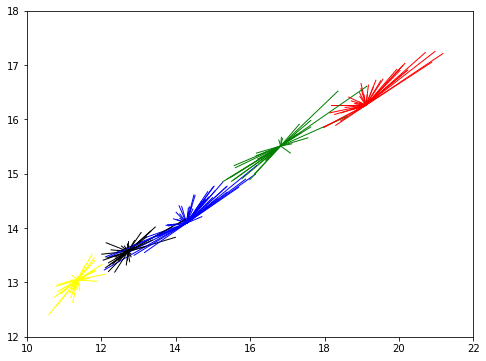

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

'''
Test datamızı okutuyoruz.
'''

def init_sample():
    data = pd.io.parsers.read_csv('SEEDS.csv')    
    Xn=data.to_numpy()
    print(Xn)
    dataLen = len(Xn)
    print(type(Xn))
    return Xn,dataLen

'''
Similarity matrisini hesaplıyoruz
'''
def cal_simi(Xn):
    ##Bu veri kümesinin benzerlik matrisi iki boyutlu bir dizidir
    simi = []
    for m in Xn:
        ##Her sayının tüm sayılara, yani matristeki bir satıra benzerliğinin listesi
        temp = []
        for n in Xn:
            ##Benzerliği hesaplamak için negatif Öklid mesafesini kullanıyoruz
            #print(len(n));
            sumAll=sum_of_squares(m, n)
            s = -np.sqrt(sumAll)
            # s =-np.sqrt((m[0]-n[0])**2 + (m[1]-n[1])**2)
            temp.append(s)
        simi.append(temp)

    ##Referans derecesini, yani köşegenin değerini, genellikle minimum veya medyan değerini ayarlıyoruz
    #p = np.min(simi)   
    #p = np.max(simi)  
    p = np.median(simi)  
    for i in range(dataLen):
        simi[i][i] = p
    return simi
'''
Hesaplama
'''
def sum_of_squares(m,n):
    sumAll=0;
    for i in range(len(n)):
        sumAll=sumAll+(m[i]-n[i])**2
    return sumAll;
'''
Responsibility matrisini, yani R'yi hesaplayın
       1：r(n+1) =s(n)-(s(n)+a(n))
       2：r(n+1)=(1-λ)*r(n+1)+λ*r(n)
'''

##R matrisini ve A matrisini başlatıyoruz
def init_R(dataLen):
    R = [[0]*dataLen for j in range(dataLen)]
    return R

def init_A(dataLen):
    A = [[0]*dataLen for j in range(dataLen)]
    return A

##R matrisini yinelemeli olarak güncelliyoruz
def iter_update_R(dataLen,R,A,simi):
    old_r = 0 ##Güncellemeden önceki r değeri
    lam = 0.5 ##Algoritma yakınsaması için kullanılan katsayı
    ##Bu döngüde R matrisini güncelliyoruz
    for i in range(dataLen):
        for k in range(dataLen):
            old_r = R[i][k]
            if i != k:
                max1 = A[i][0] + R[i][0] 
                for j in range(dataLen):
                    if j != k:
                        if A[i][j] + R[i][j] > max1 :
                            max1 = A[i][j] + R[i][j]
                ##Güncellenmiş R [i] [k] değeri
                R[i][k] = simi[i][k] - max1
                ##Tekrar güncellemek için lamda değerini kullanıyoruz
                R[i][k] = (1-lam)*R[i][k] +lam*old_r
            else:
                max2 = simi[i][0] 
                for j in range(dataLen):
                    if j != k:
                        if simi[i][j] > max2:
                            max2 = simi[i][j]
                ##Güncellenmiş R [i] [k] değeri
                R[i][k] = simi[i][k] - max2
                ##Tekrar güncellemek için lamda değerini kullanıyoruz
                R[i][k] = (1-lam)*R[i][k] +lam*old_r
    print("max_r:"+str(np.max(R)))
    #print(np.min(R))
    return R
'''
   Availability matrisini, yani A'yı hesaplıyoruz
'''
##A matrisini yinelemeli olarak güncelle
def iter_update_A(dataLen,R,A):
    old_a = 0 ##Güncellemeden önceki a değeri
    lam = 0.5 ##Algoritma yakınsaması için kullanılan katsayı
    ##Bu döngüde A matrisini güncelliyoruz
    for i in range(dataLen):
        for k in range(dataLen):
            old_a = A[i][k]
            if i ==k :
                max3 = R[0][k]
                for j in range(dataLen):
                    if j != k:
                        if R[j][k] > 0:
                            max3 += R[j][k]
                        else :
                            max3 += 0
                A[i][k] = max3
                ##Tekrar güncellemek için lamda değerini kullanıyoruz
                A[i][k] = (1-lam)*A[i][k] +lam*old_a
            else :
                max4 = R[0][k]
                for j in range(dataLen):
                   
                    if j != k and j != i:
                        if R[j][k] > 0:
                            max4 += R[j][k]
                        else :
                            max4 += 0

               
                if R[k][k] + max4 > 0:
                    A[i][k] = 0
                else :
                    A[i][k] = R[k][k] + max4

                ##Tekrar güncellemek için lamda değerini kullanıyoruz
                A[i][k] = (1-lam)*A[i][k] +lam*old_a
    print("max_a:"+str(np.max(A)))
    #print(np.min(A))
    return A

'''
   Küme merkezlerini hesaplıyoruz
'''

def cal_cls_center(dataLen,simi,R,A):
    ## Küme belirlendikten sonra önceden ayarlanmış yineleme sayısına ulaşılıncaya kadar
    ## veya küme merkezi artık değişmeyene kadar yinelemeye devam edin
    max_iter = 100    ##Maksimum yineleme sayısı
    curr_iter = 0     ##Geçerli yineleme sayısı
    max_comp = 30     ##Maksimum karşılaştırma sayısı
    curr_comp = 0     ##Mevcut karşılaştırma sayısı
    class_cen = []    ##Veri noktalarının dizinini Xn'de depolayan küme merkezlerinin listesi
    while True:
        ## R matrisini hesapla
        R = iter_update_R(dataLen,R,A,simi)
        ## A matrisini hesapla
        A = iter_update_A(dataLen,R,A)
        ## Küme merkezini hesaplamaya başlayın
        for k in range(dataLen):
            if R[k][k] +A[k][k] > 0:
                if k not in class_cen:
                    class_cen.append(k)
                else:
                    curr_comp += 1
        curr_iter += 1
        print(curr_iter)
        if curr_iter >= max_iter or curr_comp > max_comp :
            break
    return class_cen


if __name__=='__main__':
    Xn,dataLen = init_sample()
    ##R ve A matrislerini başlatma
    R = init_R(dataLen)
    A = init_A(dataLen)
    ##Similarityi hesapla
    simi = cal_simi(Xn)
    ##Küme merkezlerinin çıktısı
    class_cen = cal_cls_center(dataLen,simi,R,A)
    #for i in class_cen:
    #    print(str(i)+":"+str(Xn[i]))
    #print(class_cen)

    ##Verileri küme merkezine göre bölme
    c_list = []
    for m in Xn:
        temp = []
        for j in class_cen:
            n = Xn[j]
            #d = -np.sqrt((m[0]-n[0])**2 + (m[1]-n[1])**2)
            sumAll = sum_of_squares(m, n)
            d = -np.sqrt(sumAll)
            temp.append(d)
        
        c = class_cen[temp.index(np.max(temp))]
        c_list.append(c)
    ##Görüntüleme
    colors = ['red','blue','black','green','yellow','gray', 'cyan', 'magenta','purple']
    plt.figure(figsize=(8,6))
    plt.xlim([10,22])
    plt.ylim([12,18])
    for i in range(dataLen):
        d1 = Xn[i]
        d2 = Xn[c_list[i]]
        c = class_cen.index(c_list[i])
        plt.plot([d2[0],d1[0]],[d2[1],d1[1]],color=colors[c],linewidth=1)
        #if i == c_list[i] :
        #    plt.scatter(d1[0],d1[1],color=colors[c],linewidth=3)
        #else :
        #    plt.scatter(d1[0],d1[1],color=colors[c],linewidth=1)
    plt.show()